# Analysing Twitter Data using Python


## Importing Libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from textblob import TextBlob
import re
%matplotlib inline
plt.style.use("ggplot")
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))
print("Libraries imported successfully")

## Load DataFrame

In [2]:
df = pd.read_csv("tweets_new.csv")
df['Created_at'] = pd.to_datetime(df['Created_at'], format = "%Y-%m-%d %H:%M:%S")
df['Date'] = df['Created_at'].dt.date
df.head(10)

,Id,Tweets,Length,Likes,Retweets,Created_at,Source,Date
0,1316255614826278912,RT @SaveATrain: Travel and change of place imp...,140,0,14,2020-10-14 05:52:48,Twitter Web App,2020-10-14
1,1316254632427937793,Okay I love the writing so no hate... but how ...,140,4,0,2020-10-14 05:48:53,Twitter for iPhone,2020-10-14
2,1316253694372065281,RT @denniskanuti: This is how you will experie...,140,0,1,2020-10-14 05:45:10,moqil moqil,2020-10-14
3,1316252973543182336,This is how you will experience this amazing #...,140,0,1,2020-10-14 05:42:18,Twitter Web App,2020-10-14
4,1316252218949955584,RT @SaveATrain: Travel and change of place imp...,140,0,14,2020-10-14 05:39:18,Twitter for Android,2020-10-14
5,1316250349464956928,RT @SaveATrain: Travel and change of place imp...,140,0,14,2020-10-14 05:31:52,Twitter for iPhone,2020-10-14
6,1316247882954145792,RT @coolecotravels: Where I'd like to be now (...,140,0,4,2020-10-14 05:22:04,Twitter for iPhone,2020-10-14
7,1316244628526358530,Today's photography\nFollow 👉@Revathiguguloth\...,129,3,0,2020-10-14 05:09:08,Twitter for Android,2020-10-14
8,1316242333025751040,RT @SaveATrain: Travel and change of place imp...,140,0,14,2020-10-14 05:00:01,Twitter for iPhone,2020-10-14
9,1316240792495644672,RT @SaveATrain: Travel and change of place imp...,140,0,14,2020-10-14 04:53:54,Twitter Web App,2020-10-14


## Average Length of Tweets

In [3]:
printmd("The average length of tweets that were retrieved in **%.0f** characters" % df['Length'].mean())
print("Top 5 most tweeted character lengths")
df['Length'].value_counts().head()

The average length of tweets that were retrieved in **136** characters

Top 5 most tweeted character lengths


140    2216
139     381
138     108
133     106
136     104
Name: Length, dtype: int64

## Build WordCloud

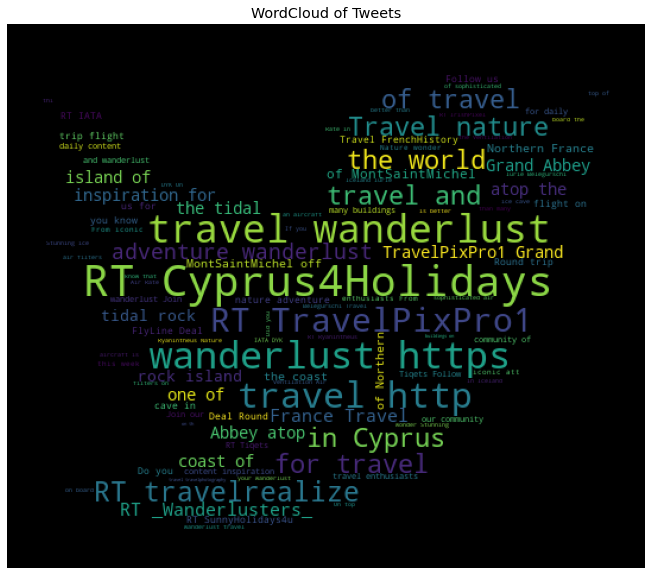

In [4]:
tweets_text = ' '.join(df['Tweets'].values)
stopwords = {'http', 'https', 'co', 'com', 'in', 'to'}
logomask = np.array(Image.open("twittermask.png"))
plt.figure(figsize = (15,10))

wordcloud = WordCloud(
stopwords=STOPWORDS.union(stopwords),
background_color='black',
mask = logomask,
max_words=100,
width=1500,
height=1000).generate(tweets_text)

plt.imshow(wordcloud)
plt.title("WordCloud of Tweets")
plt.axis('off')
plt.show()

## Likes Trend

397


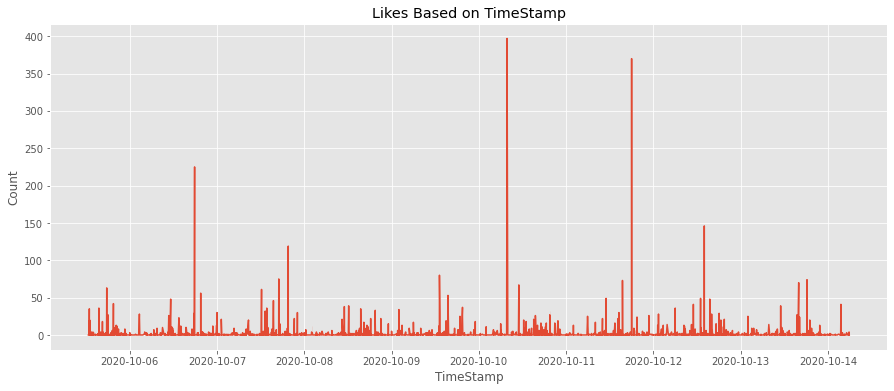

In [5]:
print(df['Likes'].max())
fig, ax = plt.subplots(figsize = (15,6))
sns.lineplot(x = df['Created_at'], y = df['Likes'].values)
plt.title("Likes Based on TimeStamp")
plt.xlabel("TimeStamp")
plt.ylabel("Count")
plt.show()

C:\Users\vedan\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


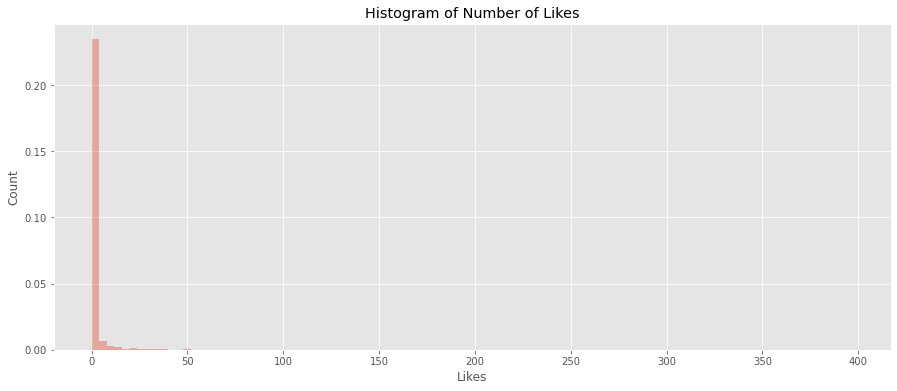

In [6]:
fig, ax = plt.subplots(figsize = (15,6))
sns.distplot(df['Likes'].values, bins = 100)
plt.title("Histogram of Number of Likes")
plt.xlabel("Likes")
plt.ylabel("Count")
plt.show()


## Retweets Trend

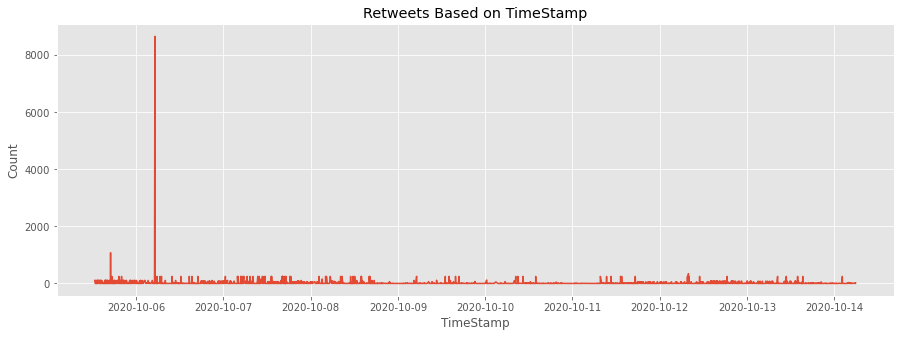

In [7]:
#print(df['Retweets'].max())
fig, ax = plt.subplots(figsize = (15,5))
sns.lineplot(x = df['Created_at'], y = df['Retweets'].values)
plt.title("Retweets Based on TimeStamp")
plt.xlabel("TimeStamp")
plt.ylabel("Count")
plt.show()

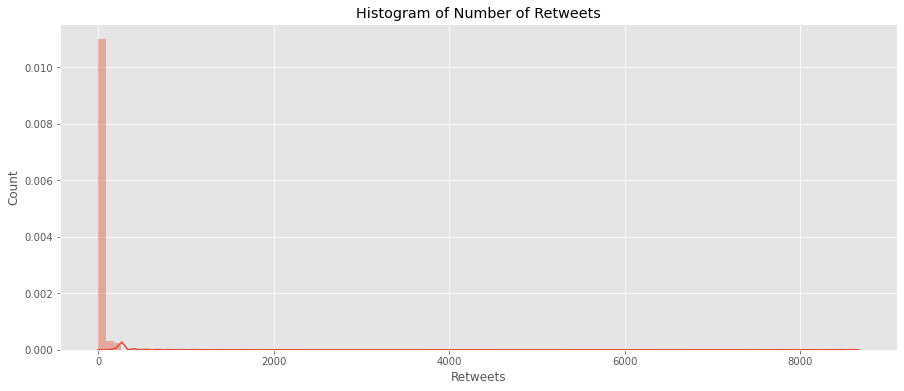

In [8]:
fig, ax = plt.subplots(figsize = (15,6))
sns.distplot(df['Retweets'].values, bins = 100)
plt.title("Histogram of Number of Retweets")
plt.xlabel("Retweets")
plt.ylabel("Count")
plt.show()

## Comparative Analysis of Tweets by Date (Likes & Retweets)

         Date  Likes  Retweets
0  2020-10-05  434.0   11184.0
1  2020-10-06  766.0   16726.0
2  2020-10-07  825.0   14991.0
3  2020-10-08  529.0    6975.0
4  2020-10-09  610.0    3312.0


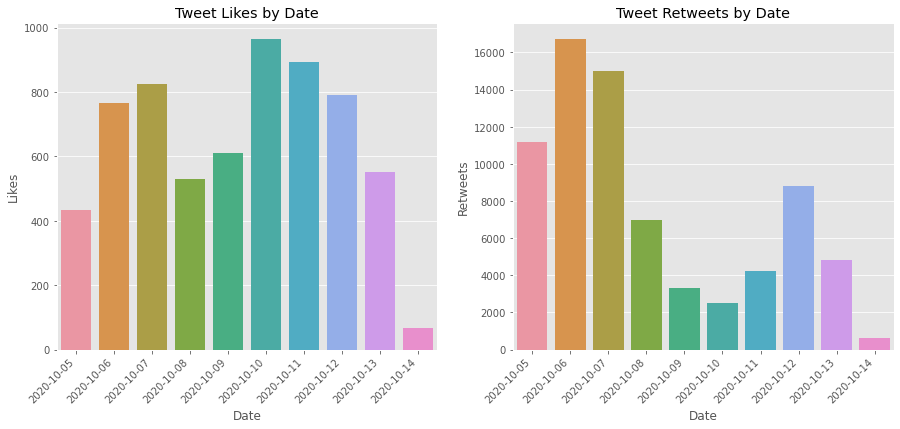

In [9]:
data = df.groupby(df['Date']).sum()
data.drop(['Id', 'Length'], axis = 1, inplace = True)
data.reset_index(inplace = True)
print(data.head())
fig, ax = plt.subplots(1, 2, figsize = (15,6))
#sns.barplot(x='Date', y='value', hue='variable', 
#             data=pd.melt(data, ['Date']))
chart = sns.barplot(x = "Date", y = "Likes", data = data, ax = ax[0])
ax[0].set_title("Tweet Likes by Date")
plt.xticks(rotation=65, horizontalalignment='right')
chart1 = sns.barplot(x = "Date", y = "Retweets", data = data, ax = ax[1])
ax[1].set_title("Tweet Retweets by Date")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
chart1.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()


## Source Trend

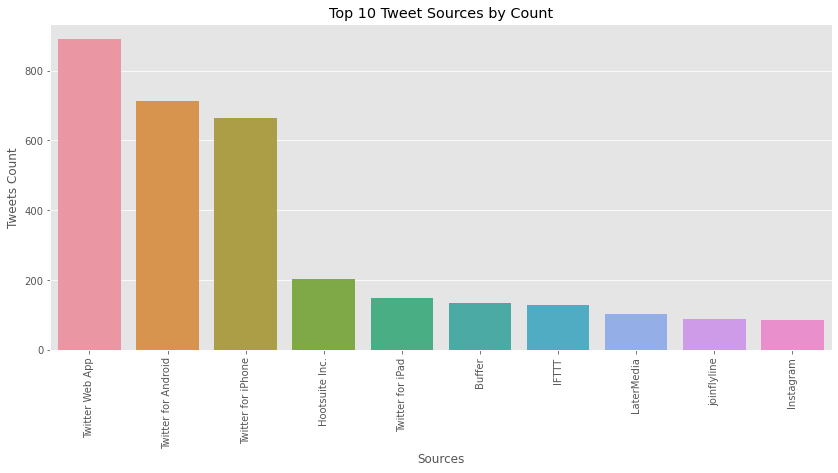

In [10]:
data = df['Source'].value_counts().to_frame().reset_index()
data = data.head(10)
fig, ax = plt.subplots(figsize = (14,6))
sns.barplot(x = data['index'], y = data['Source'])
plt.title("Top 10 Tweet Sources by Count")
plt.xlabel("Sources")
plt.ylabel("Tweets Count")
plt.xticks(rotation = 90)
plt.show()


## Named Entity Recognition

In [11]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [ ]:
def process_text(tweets):
    """Remove emoticons, numbers etc. and returns list of cleaned tweets."""
    data = tweets
    regex_remove = "(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^RT|http.+?"
    stripped_text = [
        re.sub(regex_remove, ' ',
               tweets).strip() for tweets in data
    ]
    return '\n'.join(stripped_text)
#tweets = '\n'.join(df['Tweets'].values)
tweets = process_text([tweet for tweet in df['Tweets'].values])
wikitext = nlp(tweets)

In [ ]:
for word in wikitext.ents:
    print(word.text, word.label_)

In [ ]:
spacy.explain('NORP')

In [ ]:
from spacy import displacy
displacy.render(wikitext, style = "ent", jupyter = True)

## Analysing Sentiments of Tweets

In [ ]:
def clean_tweet(tweets):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^RT|http.+?", " ", tweets).split())
def analyze_sentiment(tweets):
    analysis = TextBlob(clean_tweet(tweets))
    
    if analysis.sentiment.polarity > 0:
        return "Positive"
    elif analysis.sentiment.polarity == 0:
        return "Neutral"
    else:
        return "Negative"
df['Sentiment'] = np.array([analyze_sentiment(tweet) for tweet in df['Tweets']])
df.head()

In [ ]:
data = df['Sentiment'].value_counts().to_frame().reset_index()
data

In [ ]:
fig, ax = plt.subplots(figsize = (14,6))
sns.barplot(x = "index", y = "Sentiment", data = data)
plt.title("Analysing Sentiment of Tweet Data")
plt.xlabel("Sentiments")
plt.ylabel("Sentiment Count")
plt.show()